## Project 1 - Part 2

## <em> Optimization, Markov chain Monte Carlo, pocoMC </em>
<br>
This notebook is arranged in cells. Texts are usually written in the markdown cells, and here you can use html tags (make it bold, italic, colored, etc). You can double click on this cell to see the formatting.<br>
<br>
The ellipsis (...) are provided where you are expected to write your solution but feel free to change the template (not over much) in case this style is not to your taste. <br>
<br>
<em>Hit "Shift-Enter" on a code cell to evaluate it.  Double click a Markdown cell to edit. </em><br>

<span style="color:blue"><i> Write your partner's name here (if you have one). </i></span> <br>

***

### Imports

In [1]:
import numpy as np
from scipy.integrate import quad
import math
#For plotting
import seaborn as sns
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style='ticks')

### Mounting Google Drive locally
Mount your Google Drive on your runtime using an authorization code.

Note: When using the 'Mount Drive' button in the file browser, no authentication codes are necessary for notebooks that have only been edited by the current user.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
localpath='/Users/elizabeth/Library/CloudStorage/GoogleDrive-elizabeth.donoway@gmail.com/.shortcut-targets-by-id/1N7VNzEhLpxeYFHjRpWdzVH2k_ZEUEjV6/P188_288/P188_288_Project1_p2new/'
colabpath='/content/drive/My Drive/P188_288/P188_288_Project1_p2/'

***

#### Problem 1 - Supernova Cosmology Project

In this project, we use a compilation of supernovae data to show that the expansion of the universe is accelerating, and hence it contains dark energy. This is the Nobel prize winning research in 2011 (https://www.nobelprize.org/nobel_prizes/physics/laureates/2011/), and Saul Perlmutter, a professor of physics at Berkeley, shared a prize in 2011 for this discovery.
<br><br>
"The expansion history of the universe can be determined quite easily, using as a “standard candle” any distinguishable class of astronomical objects of known intrinsic brightness that can be identified over a wide distance range. As the light from such beacons travels to Earth through an expanding universe, the cosmic expansion stretches not only the distances between galaxy clusters, but also the very wavelengths of the photons en route. By the time the light reaches us, the spectral wavelength $\lambda$ has thus been redshifted by precisely the same incremental factor $z = \Delta \lambda/\lambda$ by which the cosmos has been stretched in the time interval since the light left its source. The recorded redshift and brightness of each such object thus provide a measurement of the total integrated expansion of the universe since the time the light was emitted. A collection of such measurements, over a sufficient range of distances, would yield an entire historical record of the universe’s expansion." (Saul Perlmutter, http://supernova.lbl.gov/PhysicsTodayArticle.pdf).
<br><br>
Supernovae emerge as extremely promising candidates for measuring the cosmic expansion. Type I Supernovae arises from the collapse of white dwarf stars when the Chandrasekhar limit is reached. Such nuclear chain reaction occurs in the same way and at the same mass, the brightness of these supernovae are always the same. The relationship between the apparent brightness and distance of supernovae depend on the contents and curvature of the universe.
<br><br>
We can infer the "luminosity distance" $D_L$ from measuring the inferred brightness of a supernova of luminosity $L$. Assuming a naive Euclidean approach, if the supernova is observed to have flux $F$, then the area over which the flux is distributed is a sphere radius $D_L$, and hence <br><br>
$$F = \frac{L}{4\pi D_L^2}.$$
<br>
In Big Bang cosmology, $D_L$ is given by:
<br><br>
$$ D_L = \frac{\chi(a)}{a} $$
<br>
where $a$ is the scale factor ($\frac{\lambda_0}{\lambda} = 1 + z = \frac{a_0}{a}$, and the quantity with the subscript 0 means the value at present. Note that $a_0 = 1, z_0 = 0$.), and $\chi$ is the comoving distance, the distance between two objects as would be measured instantaneously today. For a photon, $cdt = a(t)d\chi$, so $\chi(t) = c\int_t^{t_0} \frac{dt'}{a(t')}$. We can write this in terms of a Hubble factor ($H(t) = \frac{1}{a}\frac{da}{dt}$), which tells you the expansion rate: $\chi(a) = c\int_a^1 \frac{da'}{a'^2H(a')} = c\int_0^z \frac{dz'}{H(z')}$. (change of variable using $a = \frac{1}{1+z}$.)
<br><br>
Using the Friedmann equation (which basically solves Einstein's equations for a homogenous and isotropic universe), we can write $H^2$ in terms of the mass density $\rho$ of the components in the universe: $H^2(z) = H_0^2[\Omega_m(1+z)^3 + (1-\Omega_m)(1+z)^2].$ <br><br>
$\Omega$ is the density parameter; it is the ratio of the observed density of matter and energy in the universe ($\rho$) to the critical density $\rho_c$ at which the universe would halt is expansion. So $\Omega_0$ (again, the subscript 0 means the value at the present) is the total mass and energy density of the universe today, and consequently $\Omega_0 = \Omega_{m}$ (matter density parameter today; remember we obtained the best-fit value of this parameter in Project 1?) = $\Omega_{\mathrm{baryonoic\ matter}}$ + $\Omega_{\mathrm{dark\ matter}}$. If $\Omega_0 < 1$, the universe will continue to expand forever. If $\Omega_0 > 1$, the expansion will stop eventually and the universe will start to recollapse. If $\Omega_0 = 1$, then the universe is flat and contains enough matter to halt the expansion but not enough to recollapse it. So it will continue expanding, but gradually slowing down all the time, finally running out of steam only in the infinite future. Even including dark matter in this calculation, cosmologists found that all the matters in the universe only amounts to about a quarter of the required critical mass, suggesting a continuously expanding universe with deceleration. Then, using all this, we can write the luminosity distance in terms of the density parameters: <br><br>
$$ D_L = \frac{\chi(a)}{a} = c(1+z)\int_0^z \frac{dz'}{H(z')} = c(1+z)\int_0^z \frac{dz'}{H_0[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^2]^{1/2}}  $$ <br>
$$ = \frac{2997.92458}{h} (1+z)\int_0^z \frac{dz'}{[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^2]^{1/2}}\ [unit\ of\ Mpc] $$
<br>
where $H_0 = 100\cdot h\ [km\cdot s^{-1} Mpc^{-1}]$.
<br><br>
Fluxes can be expressed in magnitudes $m$, where $m = -2.5\cdot\mathrm{log}_{10}F$ + const. The distance modulus is $\mu = m - M$ ($M$ is the absolute magnitude, the value of $m$ if the supernova is at a distance 10pc. Then, we have:
<br><br>
$$ \mu = 25 + 5\cdot \mathrm{log}_{10}\Big(D_L\ [in\ the\ unit\ of \ Mpc]\Big)$$
<br><br>
In this assignment, we use the SCP Union2.1 Supernova (SN) Ia compilation. (http://supernova.lbl.gov/union/)
<br><br>
First, load the measured data: $z$ (redshift), $\mu$ (distance modulus), $\sigma(\mu)$ (error on distance modulus)


In [3]:
data = np.loadtxt(localpath+"sn_z_mu_dmu_plow_union2.1.txt", usecols=range(1,5))
# z
z_data = data[:,0]
# mu
mu_data = data[:,1]
# error on mu (sigma(mu))
mu_err_data = data[:,2]

<span style="color:blue"><i> 1. Plot the measured distance modulus as a function of redshift with errorbars. Then, assume three different scenarios: $\Omega_m = 0, 0.3, 1.$  </i></span> <br><br>
Remember:
$$ D_L = \frac{2997.92458}{h} (1+z)\int_0^z \frac{dz'}{[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^2]^{1/2}}$$ <br>
$$ \mu = 25 + 5\cdot \mathrm{log}_{10}(D_L)$$ <br><br>
<span style="color:blue"><i> Now, plot three curves of $\mu$ as a function of $z$ for $\Omega_m = 0, 0.3, 1$ on top of the measured data (Calculate $D_L$ using quad. For now, assume $h = 0.7$.) How do they fit? </i></span> <br>


In [4]:
def mu(z, omega_m, h=0.7):
    return 25 + 5*np.log10(D_l(z, omega_m))

def D_l(z_list, omega_m, h=0.7):
    integrand = lambda x: 1/np.sqrt(omega_m*(1+x)**3 + (1-omega_m)*(1+x)**2)
    integral = np.array([quad(integrand, 0, z)[0] for z in z_list])
    return 2997.92458*(1+z_list)*integral/h

def chi_sq(mu_data, mu_model, mu_err):
    return np.sum(((mu_data - mu_model)/mu_err)**2)

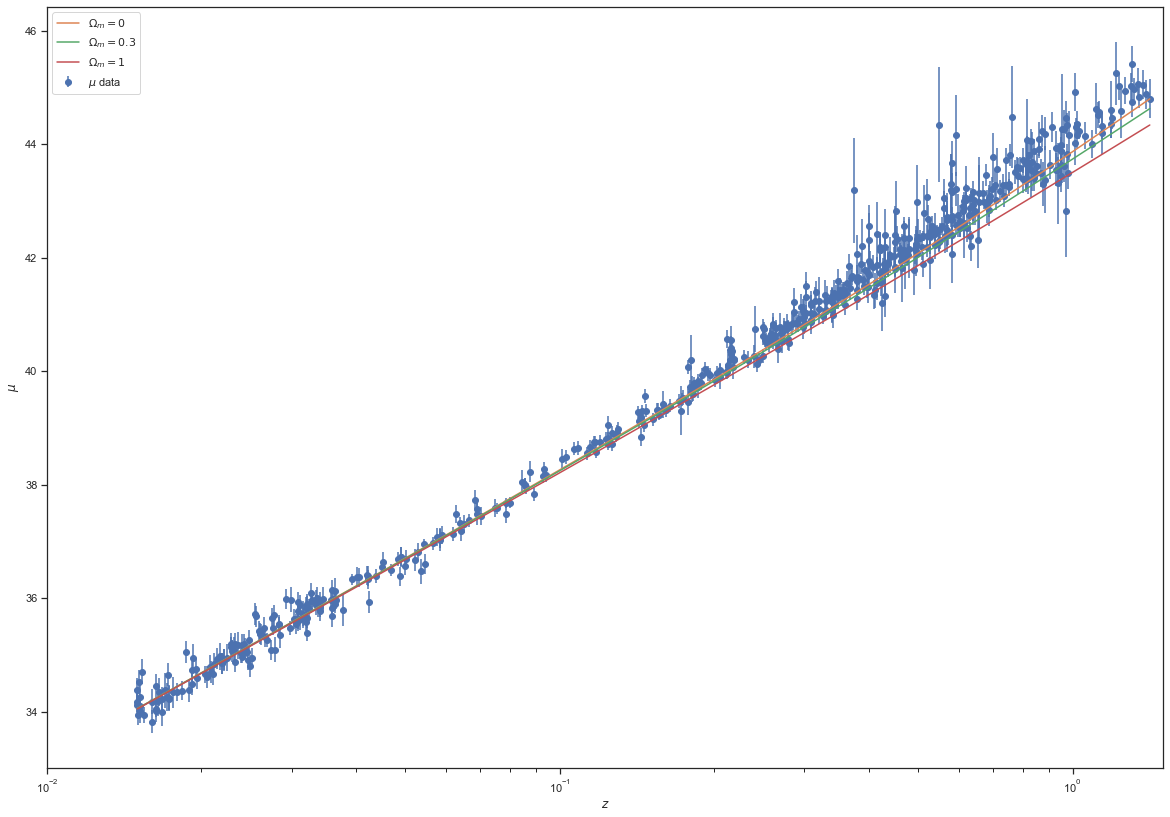

In [5]:
plt.figure(figsize = (20,14))

z_data_sorted = np.sort(z_data)[::-1]
plt.errorbar(z_data, mu_data, yerr=mu_err_data, marker='o', linestyle='', label=r'$\mu$ data', zorder=0)
plt.plot(z_data_sorted, mu(z_data_sorted, omega_m=0), label=r'$\Omega_m=0$')
plt.plot(z_data_sorted, mu(z_data_sorted, omega_m=0.3), label=r'$\Omega_m=0.3$')
plt.plot(z_data_sorted, mu(z_data_sorted, omega_m=1), label=r'$\Omega_m=1$')

plt.xscale('log')
plt.legend(loc='upper left')
plt.xlim(0.01, 1.5)
plt.xlabel('$z$')
plt.ylabel('$\mu$')
plt.show()

In [6]:
print('Chi squared Omega_m=0:', chi_sq(mu_data, mu(z_data, omega_m=0), mu_err_data))
print('Chi squared Omega_m=0.3:', chi_sq(mu_data, mu(z_data, omega_m=0.3), mu_err_data))
print('Chi squared Omega_m=1:', chi_sq(mu_data, mu(z_data, omega_m=1), mu_err_data))

Chi squared Omega_m=0: 904.6723601086578
Chi squared Omega_m=0.3: 1220.2057995368355
Chi squared Omega_m=1: 2136.059981620787


You should find that the measured data do not fit well to all three scenarios. "The high-redshift supernovae are fainter than would be expected even for an empty cosmos (corresponding to $\Omega_m = 0$)." So what's wrong?
<br><br>
"If these data are correct, the obvious implication is that the simplest cosmological model must be too simple. The next simplest model might be one that Einstein entertained for a time. Believing the universe to be static, he tentatively introduced into the equations of general relativity an expansionary term he called the “cosmological constant” ($\Lambda$) that would compete against gravitational collapse. After Hubble’s discovery of the cosmic expansion, Einstein famously rejected $\Lambda$ as his “greatest blunder.” In later years, $\Lambda$ came to be identified with the zero-point vacuum energy of all quantum fields. It turns out that invoking a cosmological constant allows us to fit the supernova data quite well." (Saul Perlmutter, https://www.nobelprize.org/nobel_prizes/physics/laureates/2011/)
<br><br>
So in short, the data indicates that faint supernovae are further away from the earth than had been theoretically expected. The expansion rate of the universe is increasing indeed. It seems that some mysterious material (which we call "dark energy") is causing such antigravity effects. The cosmological constant, $\Lambda$, the value of the energy density of the vacuum of space is widely accepted as a leading candidate of dark energy.
<br><br>
Now let us add a general form of dark energy to our model.
<br><br>
$$H^2(z) = H_0^2[\Omega_m(1+z)^3 + \Omega_{DE}(1+z)^{3(1+w)} + (1-\Omega_m-\Omega_{DE})(1+z)^2].$$ <br> $w$ is the dark energy equation of state, which is the ratio of its pressure to its energy density. $w = -1$ for the cosmological constant $\Lambda$. <br><br>
$\Omega_0 = \Omega_{m}$ (matter density parameter today) + $\Omega_{DE}$ (dark energy density parameter today), and
<br><br>
$$ D_L = \frac{\chi(a)}{a} = c(1+z)\int_0^z \frac{dz'}{H(z')} = c(1+z)\int_0^z \frac{dz'}{H_0[\Omega_m(1+z')^3 + \Omega_{DE}(1+z')^{3(1+w)} + (1-\Omega_m-\Omega_{DE})(1+z')^2]^{1/2}}  $$ <br>
$$ = \frac{2997.92458}{h} (1+z)\int_0^z \frac{dz'}{[\Omega_m(1+z')^3 + \Omega_{DE}(1+z')^{3(1+w)} + (1-\Omega_m-\Omega_{DE})(1+z')^2]^{1/2}}\ [unit\ of\ Mpc] $$
<br>
where $H_0 = 100\cdot h\ [km\cdot s^{-1} Mpc^{-1}]$.

<span style="color:blue"> <i> 2. Now assume three different scenarios: ($\Omega_m = 0.3, \Omega_{DE} = 0$), ($\Omega_m = 0, \Omega_{DE} = 1, w = -1$), and ($\Omega_m = 0.3, \Omega_{DE} = 0.7, w = -1$). Again, plot three curves of $\mu$ as a function of $z$ on top of data (assume $h = 0.7$) </i></span><br>


In [7]:
def D_l2(z_list, omega_m, omega_DE, w=-1, h=0.7):
    integrand = lambda x: 1/np.sqrt(omega_m*(1+x)**3 + omega_DE*(1+x)**(3*(1+w)) + (1-omega_m-omega_DE)*(1+x)**2)
    integral = np.array([quad(integrand, 0, z)[0] for z in z_list])
    return 2997.92458*(1+z_list)*integral/h

def mu2(z, omega_m, omega_DE, w=-1, h=0.7):
    return 25 + 5*np.log10(D_l2(z, omega_m, omega_DE, w=-1, h=0.7))

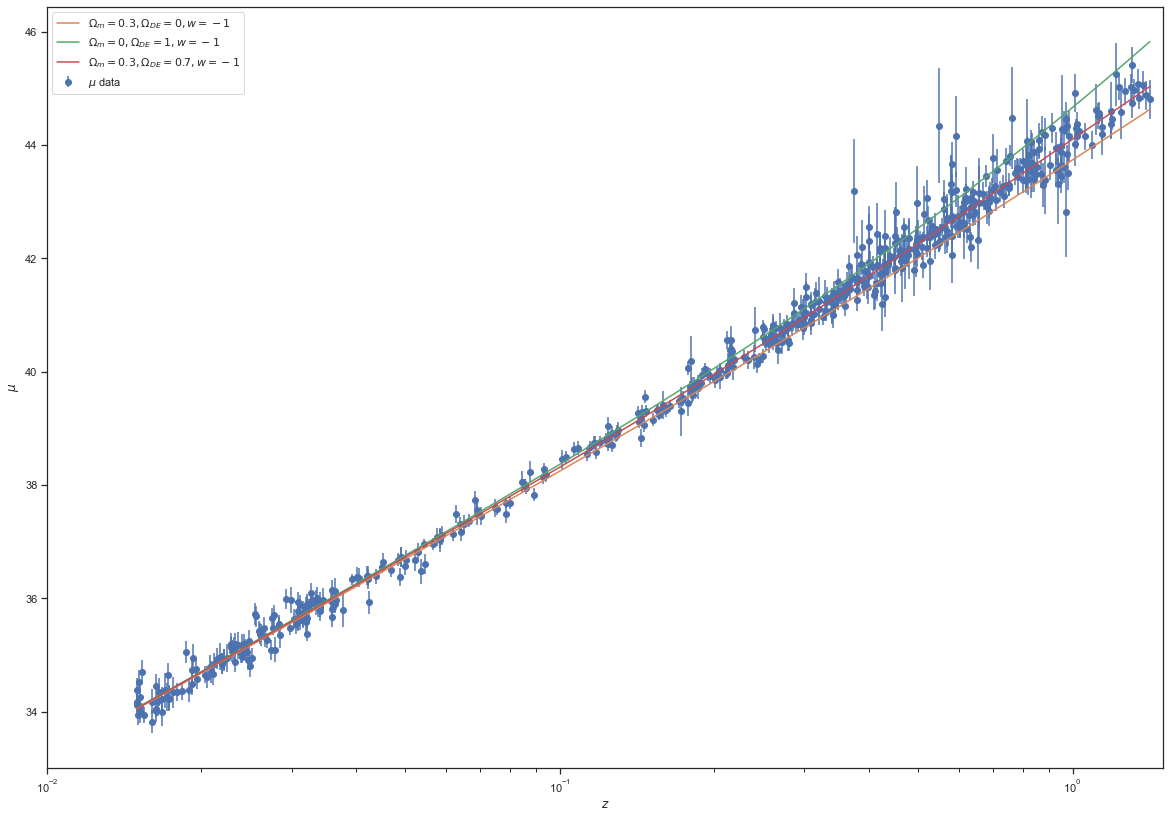

Chi squared Omega_m=0.3, Omega_DE=0: 1220.2057995368355
Chi squared Omega_m=0, Omega_DE=1: 1306.2430616410609
Chi squared Omega_m=0.3, Omega_DE=0.7: 565.0029735183822


In [8]:
plt.figure(figsize = (20,14))

z_data_sorted = np.sort(z_data)[::-1]
plt.errorbar(z_data, mu_data, yerr=mu_err_data, marker='o', linestyle='', label=r'$\mu$ data', zorder=0)
plt.plot(z_data_sorted, mu2(z_data_sorted, omega_m=0.3, omega_DE=0), label=r'$\Omega_m=0.3, \Omega_{DE}=0, w=-1$')
plt.plot(z_data_sorted, mu2(z_data_sorted, omega_m=0, omega_DE=1), label=r'$\Omega_m=0, \Omega_{DE}=1, w=-1$')
plt.plot(z_data_sorted, mu2(z_data_sorted, omega_m=0.3, omega_DE=0.7), label=r'$\Omega_m=0.3, \Omega_{DE}=0.7, w=-1$')

plt.xscale('log')
plt.legend(loc='upper left')
plt.xlim(0.01, 1.5)
plt.xlabel('$z$')
plt.ylabel('$\mu$')
plt.show()

print('Chi squared Omega_m=0.3, Omega_DE=0:', chi_sq(mu_data, mu2(z_data, omega_m=0.3, omega_DE=0), mu_err_data))
print('Chi squared Omega_m=0, Omega_DE=1:', chi_sq(mu_data, mu2(z_data, omega_m=0, omega_DE=1), mu_err_data))
print('Chi squared Omega_m=0.3, Omega_DE=0.7:', chi_sq(mu_data, mu2(z_data, omega_m=0.3, omega_DE=0.7), mu_err_data))

You basically reproduced the below figure!
![alt text](https://drive.google.com/uc?id=1pTUg9Ztj1oOgHMuZsRCQuf4yOi161ZpX)
You should see that $\Omega_m = 0.3$ and $\Omega_\Lambda = 0.7$ fits the data best. In combination with the CMB data, this shows that about 70% of the total energy density is vacuum energy and 30% is mass.
***
Now, with measurements of the distance modulus $\mu$, use Bayesian analysis to estimate the cosmological parameters.
<br><br>
let us assume that the universe is flat (which is a fair assumption since the CMB measurements indicate that the universe has no large-scale curvature). $\Omega_0 = \Omega_m + \Omega_{DE} = 1$. Then, we do not need to worry about the curvature term:<br><br>
$$ D_L = \frac{\chi(a)}{a} = c(1+z)\int_0^z \frac{dz'}{H(z')} = c(1+z)\int_0^z \frac{dz'}{H_0[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^{3(1+w)}]^{1/2}}  $$ <br>
$$ = \frac{2997.92458}{h} (1+z)\int_0^z \frac{dz'}{[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^{3(1+w)}]^{1/2}}\ [unit\ of\ Mpc] $$<br>
where $H_0 = 100\cdot h\ [km\cdot s^{-1} Mpc^{-1}]$.<br><br>
Assuming that errors are Gaussian (can be justified by averaging over large numbers of SN; central limit theorem), we calculate the likelihood $L$ as: <br><br>
$$ L \propto \mathrm{exp}\Big( -\frac{1}{2} \sum_{i = 1}^{N_{\mathrm{SN}}} \frac{[\mu_{i,\ data}(z_i) - \mu_{i,\ model}(z_i, \Omega_m, w)]^2}{\sigma(\mu_i)^2} \Big) $$
<br>
where $z_i, \mu_i, \sigma(\mu_i)$ are from the measurements, and we compute $\mu_{model}$ as a function of $z, \Omega_m, w$.

***

Next, write an MCMC code using the <b>Metropolis algorithm</b>.

Now, assume a more general form of dark energy. (Do not fix $w$ to -1; add $w$ as a parameter.)

In the flat universe, <br><br>

$$ D_L = \frac{2997.92458}{h} (1+z)\int_0^z \frac{dz'}{[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^{3(1+w)}]^{1/2}}\ [unit\ of\ Mpc] $$
<br>
where $H_0 = 100\cdot h\ [km\cdot s^{-1} Mpc^{-1}]$. Here, we fix $h = 0.7$.<br><br>
We calculate the likelihood $L$ as: <br><br>
$$ \mathrm{ln}(L) \approx -\frac{1}{2} \sum_{i = 1}^{N_{\mathrm{SN}}} \frac{[\mu_{i,\ data}(z_i) - \mu_{i,\ model}(z_i, \Omega_m, w)]^2}{\sigma(\mu_i)^2} = -\frac{1}{2} \sum_{i = 1}^{N_{\mathrm{SN}}} \frac{\Delta \mu_i^2}{\sigma(\mu_i)^2} $$
<br>
where $$ \mu_{i,\ model}(z_i, \Omega_m, w) = 25 + 5\cdot \mathrm{log}_{10}(D_{L,\ i})$$<br>
$$ D_{L,\ i} = \frac{2997.92458}{0.7} (1+z_i)\int_0^{z_i} \frac{dz'}{[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^{3(1+w)}]^{1/2}} $$
<br><br>
<span style="color:blue"> <i> 3. Run the MCMC code to estimate $w$ and $\Omega_m$. Plot 1-d posterior of $w$ and $\Omega_m$ as well as 2-d posterior (i.e. plot the chain in two-dimensional parameter space. Make sure that the chain has converged (you can change nsamples, nburn).  </i></span><br><br>

Hint:

Set the length of MCMC chains to be 15,000 (or even more if you think that the chain has not yet converged.) In the end, you should throw away the first 20% of the chain as burn-in. (20% is an arbitrary number. You can plot the chain and estimate the burn-in period.)

Then, set the random initial point in the parameter space $(w, \Omega_m)$: let $w$ be negative and $\Omega_m$ be positive and draw a random number using np.random.uniform(). Set initial likelihood to low value (e.g. -1.e100) so that next point is accepted.

Now, draw a new sample starting from this random initial point. Here we assume that the proposal distribution is Gaussian with arbitrary width: in this problem, we assume that $\sigma = 0.01$ (This determines how far you propose jumps.) for distributions for both $w, \Omega_m$.

For example, say that you start with $(w, \Omega_m)$ = $(-0.3, 0.7)$. Then, draw a new sample of $w$ from a Gaussian with $\mu = -0.3, \sigma = 0.01$ and a new sample of $\Omega_m$ from a Gaussian with $\mu = -0.7, \sigma = 0.01$.

Now, evaluate the log likelihood value of this new point.

If the value has gone up, accept the point.

Otherwise, accept it with probability given by ratio of likelihoods:
Draw a random number from a uniform distribution between 0 and 1 ( $\alpha$ = np.random.uniform() ). If the ratio $ln(\frac{L_{new}}{L_{old}})$ is greater than $ln(\alpha)$ (i.e. $\frac{L_{new}}{L_{old}} > \alpha$), then accept it. Otherwise, reject it and stay at your old point.

Repeat this 15,000 times (the length of chain) and plot the distributions of $(w, \Omega_m)$.

See the undergrad version for more hints.

In [ ]:
# Import data
data = np.loadtxt("/content/drive/My Drive/P188_288/P188_288_Project1_p2/sn_z_mu_dmu_plow_union2.1.txt", usecols=range(1,5))
# z
z_data = data[:,0]
# mu
mu_data = data[:,1]
# error on mu (sigma(mu))
mu_err_data = data[:,2]

In [10]:
def D_l3(z_list, omega_m, w, h=0.7):
    integrand = lambda x: 1/np.sqrt(omega_m*(1+x)**3 + (1-omega_m)*(1+x)**(3*(1+w)))
    integral = np.array([quad(integrand, 0, z)[0] for z in z_list])
    return 2997.92458*(1+z_list)*integral/h

def mu3(z, omega_m, w, h=0.7):
    return 25 + 5*np.log10(D_l3(z, omega_m, w, h=0.7))

def chi_sq(mu_data, mu_model, mu_err):
    return np.sum(((mu_data - mu_model)/mu_err)**2)

In [11]:
# Define the likelihood function:

def lnL(omega_m, w, z_data=z_data):

    # Treat unphysical regions by setting likelihood to (almost) zero:
    if(omega_m<=0 or w>=0):
        lnL = -1e100
    else:
    # Compute difference with theory mu at redshifts of the SN, for trial Omegam
    # Compute ln(likelihood) assuming gaussian errors
        lnL = -0.5*chi_sq(mu_data, mu3(z_data, omega_m, w), mu_err_data)

    return lnL

In [12]:
# Draw new proposed samples from a proposal distribution, centred on old values
# Accept or reject, and colour points according to ln(likelihood):

def MCMC(chain_length=15000):
    chain = np.zeros([chain_length, 3])
    lnL_old = -1.e100 # initial likelihood
    w = -np.random.uniform() # set w
    omega_m = np.random.uniform() # set omega_m
    chain[0] = [w, omega_m, lnL_old]
    for i in range(1,chain_length):
        omega_m_new = np.random.normal(omega_m, 0.01) # draw from gaussian centered around omega_m with error 0.01
        w_new = np.random.normal(w, 0.01) # draw from gaussian centered around w with error 0.01
        lnL_new = lnL(omega_m_new, w_new)
        if lnL_new > lnL_old:
            omega_m = omega_m_new
            w = w_new
            lnL_old = lnL_new
        else:
            lnL_ratio = lnL_new - lnL_old
            alpha = np.random.uniform()
            if lnL_ratio > np.log(alpha):
                omega_m = omega_m_new
                w = w_new
                lnL_old = lnL_new
        chain[i] = [w, omega_m, lnL_old]
    return chain

In [13]:
chain3 = MCMC()

In [14]:
burnin = 2*math.floor(len(chain3)/10)
mean_w = np.mean(chain3[burnin:,0])
std_w = np.std(chain3[burnin:,0])
mean_omega_m = np.mean(chain3[burnin:,1])
std_omega_m = np.std(chain3[burnin:,1])
print('w = ', mean_w, '+/-', std_w)
print('Omega_m = ', mean_omega_m, '+/-', std_omega_m)
print(f'Chi squared:', chi_sq(mu_data, mu3(z_data, omega_m=mean_omega_m, w=mean_w), mu_err_data))

w =  -1.0580129690716724 +/- 0.12202767336370224
Omega_m =  0.29682098828419307 +/- 0.04806181738938483
Chi squared: 562.4827071664379


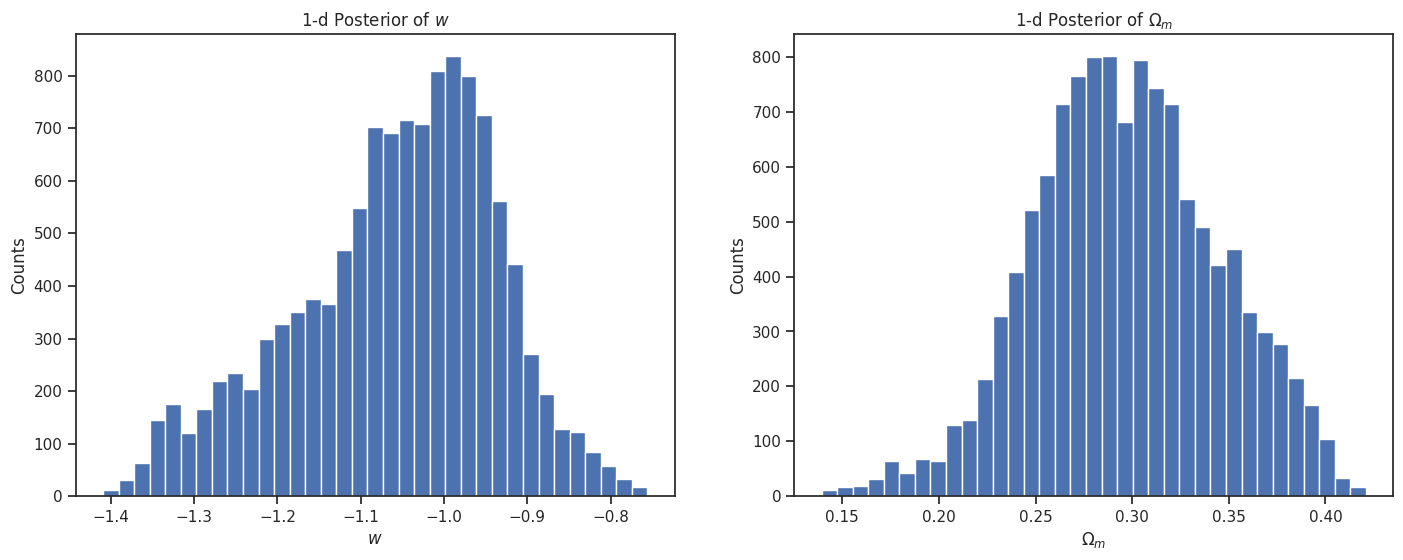

In [43]:
fix, ax = plt.subplots(1,2, figsize=(17,6))

ax[0].hist(chain3[burnin:,0], bins=35)
ax[1].hist(chain3[burnin:,1], bins=35)

ax[0].set(xlabel='$w$', ylabel='Counts', title='1-d Posterior of $w$')
ax[1].set(xlabel='$\Omega_m$', ylabel='Counts', title='1-d Posterior of $\Omega_m$')

plt.show()

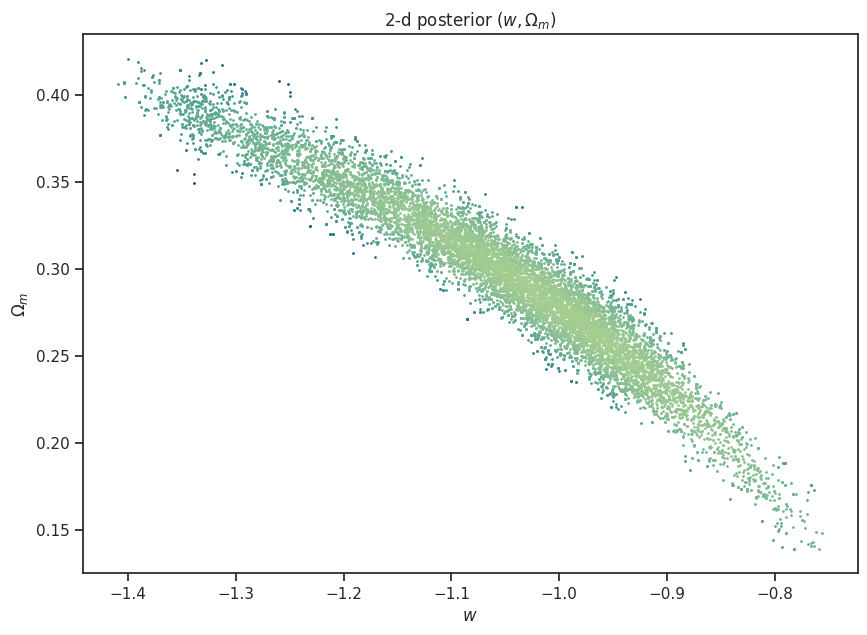

In [44]:
plt.figure(figsize = (10,7))

colormap=sns.color_palette("crest", as_cmap=True)
norm = colors.LogNorm(-np.max(chain3[burnin:,2]), -np.min(chain3[burnin:,2]))

for i in range(burnin,len(chain3)):
    plt.plot(chain3[i,0], chain3[i,1], marker='o', linestyle='', ms=1, color=colormap(norm(-chain3[i,2])))

plt.xlabel('$w$')
plt.ylabel(r'$\Omega_m$')
plt.title('2-d posterior ($w, \Omega_m$)')
plt.show()

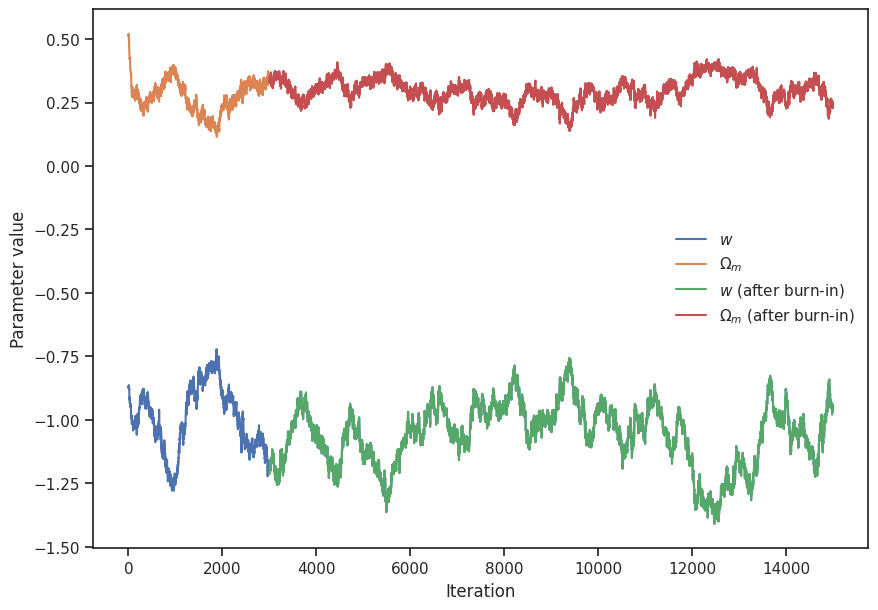

In [45]:
plt.figure(figsize = (10,7))

plt.plot(chain3[:,0], label='$w$')
plt.plot(chain3[:,1], label='$\Omega_m$')
plt.plot(np.arange(burnin,len(chain3),1), chain3[burnin:,0], label='$w$ (after burn-in)')
plt.plot(np.arange(burnin,len(chain3),1), chain3[burnin:,1], label='$\Omega_m$ (after burn-in)')

plt.legend(loc='best', frameon=False)
plt.xlabel('Iteration')
plt.ylabel('Parameter value')
plt.show()

***

### Problem 2 : Constraints on Galaxy Clustering

MCMC methods can also be used to constrain parameters in more complicated problems. Here, we consider a constraint on the Halo Occupation Distribution (HOD) models for projected galaxy clustering.

HOD models are used to interpret the relation of galaxy distributions in large scale structure to the dark matter distribution. They describe related properties of the galaxy distribution within a dark matter halo: The probability distribution of the number of galaxies within that halo in relation to the mass of the halo, the distribution in space of galaxies withing the DM halo and the distribution in velocity of galaxies in the halo.

Traditional HOD models make two assumptions: (1) that all galaxies reside in dark matter haloes and are biased tracers of the underlying matter density and (2) galaxies occupy halos **only** as a function of the halo mass $M_{vir}$. However, these are not necessarily correct, an effect called *halo assembly bias* could be significant. They also add additional parameters to the HOD model. In this problem, we will infer some HOD model parameters given some input data using MCMC.

First, we will describe the parameters. HOD models usually treat central galaxies and satellite galaxies in a halo separately, and the occupation statistics of the central galaxy will be different than the occupation statistics of the satellite galaxies in the halo.
The average number of central galaxies in a halo of mass $M$ is given by

$$\langle N_{cen}\rangle_{M} = \frac12 \left[1 + \mathrm{erf}\left( \frac{\log M - \log M_{\mathrm{min}}}{\sigma_{\log M}}\right)\right]$$

While the average number of satellite galaxies in a halo of mass $M$ is given by

$$\langle N_{sat}\rangle_{M} = \left[\frac{M-M_0}{M_1}\right]^\alpha$$

The parameter $M_{\mathrm{min}}$ describes the halo mass at which the halo has 50\% probability to host a central galaxy, while the parameter $\sigma_{\log M}$ can be considered the rate at which the likelihood of the central galaxy to exist increases alongside halo mass. The parameter $M_1$ is the halo mass at which an average halo would host one satellite galaxy, while $M_0$ is the halo mass at which an average halo would not have a satellite galaxy. $\alpha$ is the power-law exponent relation parameter between the number of satellites and the halo mass. Lastly, we also have the two parameters $A_{cen}$ and $A_{sat}$, quantify describe the halo assembly bias.

In summary, we take a likelihood model of the Halo Occupation Distribution and infer the following parameters:
>$$[\log(M_{\mathrm{min}}), \sigma_{\log M}, \log(M_0), \log(M_1), \alpha, A_{cen}, A_{sat}]$$

(This problem is based on the following paper: https://arxiv.org/pdf/1606.07817.pdf)

In [27]:
! git clone https://github.com/minaskar/pocomc.git
%cd /content/pocomc
! git -c advice.detachedHead=false checkout fc2b75752527528e548485519d9da25d258c3ed4
! pip install .
%cd ..
! git clone https://github.com/minaskar/zentner19data.git
! pip install corner
! pip install tabcorr
! pip install halotools

Cloning into 'pocomc'...
remote: Enumerating objects: 2114, done.
remote: Counting objects: 100% (620/620), done.
remote: Compressing objects: 100% (258/258), done.
remote: Total 2114 (delta 345), reused 579 (delta 334), pack-reused 1494
Receiving objects: 100% (2114/2114), 23.96 MiB | 20.16 MiB/s, done.
Resolving deltas: 100% (1161/1161), done.
/content/pocomc
HEAD is now at fc2b757 fixed mcmc
Processing /content/pocomc
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 3.7 MB/s eta 0:00:00
  Created wheel for pocomc: filename=pocomc-0.3.0-py3-none-any.whl size=38244 sha256=be8f1bbc9c4074f05e94cab3516343da539736e2029ead8b96c228560e6042bf
  Stored in directory: /tmp/pip-ephem-wheel-cache-pii2py8n/wheels/af/12/2c/b0954f8ae61a744389b2761e0ec7410f84b69a838adcb41b4b
Successfully built pocomc
/content
Cloning into 'zentner19data'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects:

In [28]:
import numpy as np
import pocomc as pc
import corner
from scipy.stats import uniform
from tabcorr import TabCorr
from halotools.empirical_models import HodModelFactory
from halotools.empirical_models import AssembiasZheng07Cens
from halotools.empirical_models import AssembiasZheng07Sats

In [29]:
import sys;
sys.path.append('/content/drive/My Drive/P188_288/P188_288_Project1_p2new')

In [30]:
# Load data
halotab = TabCorr.read('zentner19data/bolplanck.hdf5')
cens_occ_model = AssembiasZheng07Cens()
sats_occ_model = AssembiasZheng07Sats()
model = HodModelFactory(centrals_occupation=cens_occ_model,
                        satellites_occupation=sats_occ_model)

n_obs = 6.37e-3
n_err = 0.75e-3
wp_obs = np.genfromtxt('zentner19data/wp_dr72_bright0_mr20.0_z0.106_nj400')[:, 1] # Observed galaxy two-point function
wp_cov = np.genfromtxt('zentner19data/wpcov_dr72_bright0_mr20.0_z0.106_nj400') # Observed galaxy two-point function covariance.

First, we would like to define priors on the model parameters. Since we don't know too much beyond the range of the priors, we will define uniform priors for each parameter as given:

\begin{array}{ c|c }
 \text{Parameter} & \text{Prior Interval} \\
 \hline
 \log(M_{\mathrm{min}}) & [9.0, 14.0] \\
 \sigma_{\log M} & [0.01, 1.5]\\
 \log(M_0) & [9.0, 14.0]\\
 \log(M_1) & [10.7, 15.0]\\
 \alpha & [0.0, 2.0]\\
 A_{cen} & [-1.0, 1.0] \\
 A_{sat} & [-1.0, 1.0]
\end{array}

So we define the priors as a list to the `pc.Prior` function, each item in the list should be a uniform random variable given by `uniform(lower, upper-lower)`.


In [31]:
# Define prior

prior = pc.Prior([
    uniform(9,14-9), # logMmin in [9,14]
    uniform(0.01,1.5-0.01), # sigma_logM in [0.01,1.5]
    uniform(9,14-9), # logM0 in [9,14]
    uniform(10.7,15-10.7), # logM1 in [10.7,15]
    uniform(0,2-0), # alpha in [0,2]
    uniform(-1,1-(-1)), # A_cen (mean_occupation_centrals_assembias_param1) in [-1,1]
    uniform(-1,1-(-1)), # A_sat (mean_occupation_satellites_assembias_param1) in [-1,1]
])

names = ['logMmin', 'sigma_logM', 'logM0', 'logM1', 'alpha',
         'mean_occupation_centrals_assembias_param1',
         'mean_occupation_satellites_assembias_param1']

Next, we define the Log Likelihood Function.

Following the accompanying paper to this problem, we define the likelihood of the form $\mathcal{L} \propto e^{-\chi^2/2}$, with the $\chi^2$ given as

$$\chi^2 = \Delta w_{p,i}\, [C^{-1}]_{ij}\, \Delta w_{p, j} + \frac{(n_g^{\text{mock}} - n_g^{\text{obs}})^2}{\sigma^2_n}$$

with $ \Delta w_{p,i} \equiv w_p^{\text{mock}}(r_{p, i}) -  w_p^{\text{obs}}(r_{p, i})$ being the difference between the projected and observed two point correlation functions $w_{p}(r_{p,i})$. The observed $w_p^{\text{obs}}$ is given to you while the predicted $w_p^{\text{mock}}$ is received from the model (see below). The $r_{p,i}$ represents the 12 $r$ bins, and you can see that the given $w_p$ are indeed 12 dimensional. $C$ is the covariance matrix of the measurements (also given), and the term $\frac{(n_g^{\text{mock}} - n_g^{\text{obs}})^2}{\sigma^2_n}$ is the contribution from the difference between the predicted and measured galaxy number densities. ($n_g^{\text{mock}}$ is given by the model, while $\sigma_n$ and $n_g^{\text{obs}}$ are given from the data).

<span style="color:blue"> <i> 1. Using this chi square given above, define the complete log likelihood function.

In [32]:
# Define log-likelihood function

def log_likelihood(x):

    x = x.copy() # copy the x so as to not change the original
    model.param_dict.update(dict(zip(names, x))) # update model with input parameters
    n_mod, wp_mod = halotab.predict(model) # get predicted
    delta_w = wp_mod - wp_obs
    delta_n = n_mod - n_obs
    chi_sq = delta_w @ np.linalg.inv(wp_cov) @ delta_w + (delta_n/n_err)**2

    return -chi_sq/2

Next, let's try <b>maximum likelihood estimation (MLE)</b>.

Given the log likelihood distribution from the previous part. To get the MLE estimate, we should maximize the log likelihood. As we have uniform prior constraints (given above in part 1), we would want to conduct a constrained optimization within these bounds.

Let us use scipy.optimize.minimize (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) to get the MLE of the model parameters: we can minimize -log_likelihood to get the optimal MLE parameters.

<span style="color:blue"> <i> 2. Using the Limited-memory BFGS method ('L-BFGS-B'), find the MLE estimate of 7 model parameters with scipy.optimize.minimize. Print your MLE estimates of the 7 model parameters. </i></span><br>

Hint: you can do

```
opt_p = minimize(**"1.-logp function"**, **2.initial guess (x0 in this case)**, method='L-BFGS-B', bounds=**bounds**, options={'disp': True})
```
After optimization terminated successfully, you can retrieve the best-fit parameters with:

&nbsp; `opt_p.x`

In [33]:
from scipy.optimize import minimize

In [34]:
# bounds
# Given by prior table above
bounds = [(9,14), # logMmin in [9,14]
          (0.01,1.5), # sigma_logM in [0.01,1.5]
          (9,14), # logM0 in [9,14]
          (10.7,15.0), # logM1 in [10.7,15.0]
          (0,2), # alpha in [0,2]
          (-1,1), # mean_occupation_centrals_assembias_param1 in [-1,1]
          (-1,1), # mean_occupation_satellites_assembias_param1 in [-1,1]
          ]
# initial guesses
# we simply choose the mid points for all the uniform ranges
x0 = [(b[0]+b[1])/2 for i,b in enumerate(bounds)]

In [35]:
opt_p = minimize(lambda xx: -1*log_likelihood(xx), x0, method='L-BFGS-B', bounds=bounds, options={'disp': True})
print(opt_p)
print(opt_p.x)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 7.202152043311422
        x: [ 1.216e+01  6.677e-01  1.218e+01  1.327e+01  1.061e+00
             1.000e+00 -6.215e-02]
      nit: 68
      jac: [-2.006e-02  2.272e-02 -2.144e-03  6.409e-02 -9.775e-02
            -4.998e+00 -1.966e-02]
     nfev: 896
     njev: 112
 hess_inv: <7x7 LbfgsInvHessProduct with dtype=float64>
[12.15663725  0.66772329 12.18378767 13.26762426  1.06054425  1.
 -0.06214946]


In [36]:
labels = [r'$\log M_{min}$', r'$\sigma_{\log M}$',r'$\log M_0$',r'$\log M_1$',r'$\alpha$',r'$A_c$',r'$A_s$']

for i in range(len(labels)):
    print(r"MLE value of %s = %.5f" %(labels[i], opt_p.x[i]))

MLE value of $\log M_{min}$ = 12.15664
MLE value of $\sigma_{\log M}$ = 0.66772
MLE value of $\log M_0$ = 12.18379
MLE value of $\log M_1$ = 13.26762
MLE value of $\alpha$ = 1.06054
MLE value of $A_c$ = 1.00000
MLE value of $A_s$ = -0.06215


Now that we have the optimal parameters using Maximum Likelihood Estimation, we can do what we did in Homework 4 and plot the 1D and 2D constraints on these parameters as multivariate Gaussians. To do this, we would first need to find the Covariance matrix of the best-fit parameters. We do this by computing the Hessian of the negative log-likelihood function at the best fit parameters and inverting the Hessian to get the covariance matrix.

The Hessian is computed from the `hessian` package. The Hessian at the best fit parameter `x_best` is:
`Hessian(lambda xx: -log_likelihood(xx))(x_best)`
(`x_best` is the values you printed in part 3). We would then take the inverse of this to return the covariance matrix at these best fit parameters.

**Note that the caveat of this MLE approach is that we implicitly assume a Gaussian likelikelihood for the multivariate distribution of the model parameters, as we'll see later in this problem when we work with MCMC, this is not necessarily a true assumption.**


<span style="color:blue"> <i> 3. Compute the covariance matrix, and using similar code as Homework 4 and Project 1 Part 1, plot a stair plot with 1D and 2D constraints on the parameters. For the 2-d plot, show 68% and 95% confidence ellipses for pairs of parameters. **However, instead of having these plots centred on the ellipses, use the priors given above as bounds on your stair plot**

In [37]:
from hessian import Hessian
from scipy.stats import norm

In [38]:
Hess = Hessian(lambda xx: -log_likelihood(xx))(opt_p.x)
cov = np.linalg.inv(Hess)
mean = x0

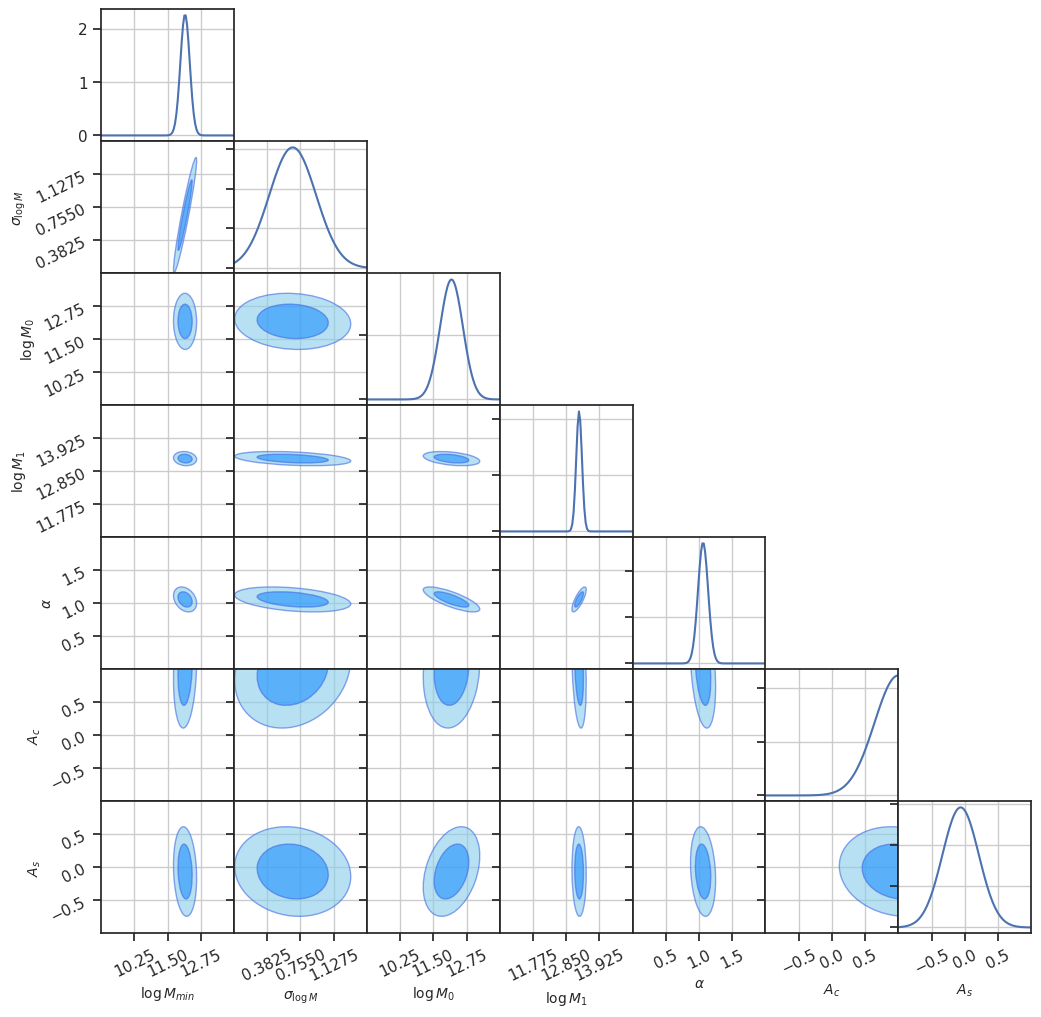

In [39]:
import matplotlib as mpl

def gaussian(x, mu, sigma, amp=1):
    return amp/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*((x-mu)/sigma)**2)

# Triangle Plot (Look at 188 version for hints)
# Similar as HW4 but modified for 7 parameters instead of 6

fig, axes = plt.subplots(7,7,figsize=(12,12))
fig.subplots_adjust(wspace=0, hspace=0)

p_tex = np.array([r'$\log M_{min}$', r'$\sigma_{\log M}$',r'$\log M_0$',r'$\log M_1$',r'$\alpha$',r'$A_c$',r'$A_s$'])

C = cov

best_fit = opt_p.x
bounds_list = np.array([[9,14], [0.01,1.5], [9,14], [10.7,15.0], [0,2], [-1,1], [-1,1]])

for i in range(7):
    for j in range(7):
        ax = axes[i, j]
        if j > i:
            ax.axis('off')
            continue
        elif i == j:
            # diagonal part
            ax.grid(True)
            xarr = np.linspace(bounds_list[j,0], bounds_list[j,1], 100)
            yarr = gaussian(xarr, best_fit[i], np.sqrt(C[i,i]))
            ax.plot(xarr, yarr)
            ax.set_xlim(bounds_list[j,0], bounds_list[j,1])
            ax.set_xticks([(mean[j]+bounds_list[j,0])/2, mean[j], (mean[j]+bounds_list[j,1])/2])
        else:
            # off-diagonal part
            ax.grid(True)

            # Covariance matrix
            CovM = np.array([[C[i,i], C[i,j]], [C[j,i], C[j,j]]])

            # Get eigenvalue/vector using svd
            eigvec, eigval, u = np.linalg.svd(CovM)

            # Get Semimajor/minor axes of the ellipse
            semimaj = np.sqrt(eigval[0])*2.
            semimin = np.sqrt(eigval[1])*2.

            # Rotation angle of the ellipse
            theta = np.arctan(eigvec[0][1]/eigvec[0][0])

            # Create ellipses
            ell1 = mpl.patches.Ellipse(xy=[best_fit[j], best_fit[i]], width=1.52*semimin, height=1.52*semimaj,
                                      angle = -theta*180/np.pi, facecolor = 'dodgerblue',
                                      edgecolor = 'royalblue', label = '68% confidence', alpha=0.6)
            ell2 = mpl.patches.Ellipse(xy=[best_fit[j], best_fit[i]], width=2.48*semimin, height=2.48*semimaj,
                                       angle = -theta*180/np.pi, facecolor = 'skyblue',
                                       edgecolor = 'royalblue', label = '95% confidence', alpha=0.6)

            ax.add_patch(ell2)
            ax.add_patch(ell1)

            ax.set_xlim(bounds_list[j,0], bounds_list[j,1])
            ax.set_ylim(bounds_list[i,0], bounds_list[i,1])
            ax.set_xticks([(mean[j]+bounds_list[j,0])/2, mean[j], (mean[j]+bounds_list[j,1])/2])
            ax.set_yticks([(mean[i]+bounds_list[i,0])/2, mean[i], (mean[i]+bounds_list[i,1])/2])


        if j != 0:
            ax.set_yticklabels([])
        if i != 6:
            ax.set_xticklabels([])
        if j == 0 and i !=0:
            ax.set_ylabel(p_tex[i], fontsize=10)
            [tl.set_rotation(26) for tl in ax.get_yticklabels()]
        if i == 6:
            ax.set_xlabel(p_tex[j], fontsize=10)
            [tl.set_rotation(26) for tl in ax.get_xticklabels()]

Next, we run a MCMC sampler on the same log likelihood function. We use the pocoMC sampler imported earlier for this purpose. Input the prior and log likelihoods from before and run the MCMC (**should take around 5 minutes**)

In [40]:
# Run pocoMC sampler
# put in the prior and log likelihoods
sampler = pc.Sampler(prior=prior, likelihood=lambda xx: log_likelihood(xx))

sampler.run()

samples, weights, logl, logp = sampler.posterior()

logz, logz_err = sampler.evidence()

print('logZ = ', np.round(logz,4), '+-', np.round(logz_err,4))

Iter: 40it [06:29,  9.74s/it, calls=65500, beta=1, logZ=-24.7, ESS=4.81e+3, accept=0.659, steps=4, logp=-19.8, efficiency=1]


logZ =  -24.7084 +- 0.0308



<span style="color:blue"> <i> 4. From the chain, obtain 1-d constraints on all 8 parameters. Print results. Also, show how far your MLE estimates are from the MCMC means ( Say (MLE estimate-MCMC mean)/MCMC standard deviation = 2. Then, your MLE estimate is 2 sigma away from the MCMC mean. )  </i></span><br>


In [41]:
for i in range(len(labels)):
    print("%s = %.5f +/- %.5f" %(labels[i], np.mean(samples[:,i]), np.std(samples[:,i])))

for i in range(len(labels)):
    print("%s : MLE values %.2f sigma away from MCMC mean" %(labels[i], (opt_p.x[i]-np.mean(samples[:,i]))/np.std(samples[:,i])))

$\log M_{min}$ = 12.27183 +/- 0.23656
$\sigma_{\log M}$ = 0.74650 +/- 0.33007
$\log M_0$ = 11.12438 +/- 1.02216
$\log M_1$ = 13.32293 +/- 0.09721
$\alpha$ = 1.09297 +/- 0.06927
$A_c$ = 0.77118 +/- 0.25471
$A_s$ = 0.02185 +/- 0.29082
$\log M_{min}$ : MLE values -0.49 sigma away from MCMC mean
$\sigma_{\log M}$ : MLE values -0.24 sigma away from MCMC mean
$\log M_0$ : MLE values 1.04 sigma away from MCMC mean
$\log M_1$ : MLE values -0.57 sigma away from MCMC mean
$\alpha$ : MLE values -0.47 sigma away from MCMC mean
$A_c$ : MLE values 0.90 sigma away from MCMC mean
$A_s$ : MLE values -0.29 sigma away from MCMC mean


Finally, we can compare MCMC and MLE results: MLE gets the peak of the posterior most of the time, but the Laplace approximation fails to give the full posterior shape.

<span style="color:blue"> <i> 5. Execute the cell below to plot the MCMC stair plot. Compare to your stair plot from part 3 and discuss the differences. Also compare to figure 6 from https://arxiv.org/pdf/1606.07817.pdf.

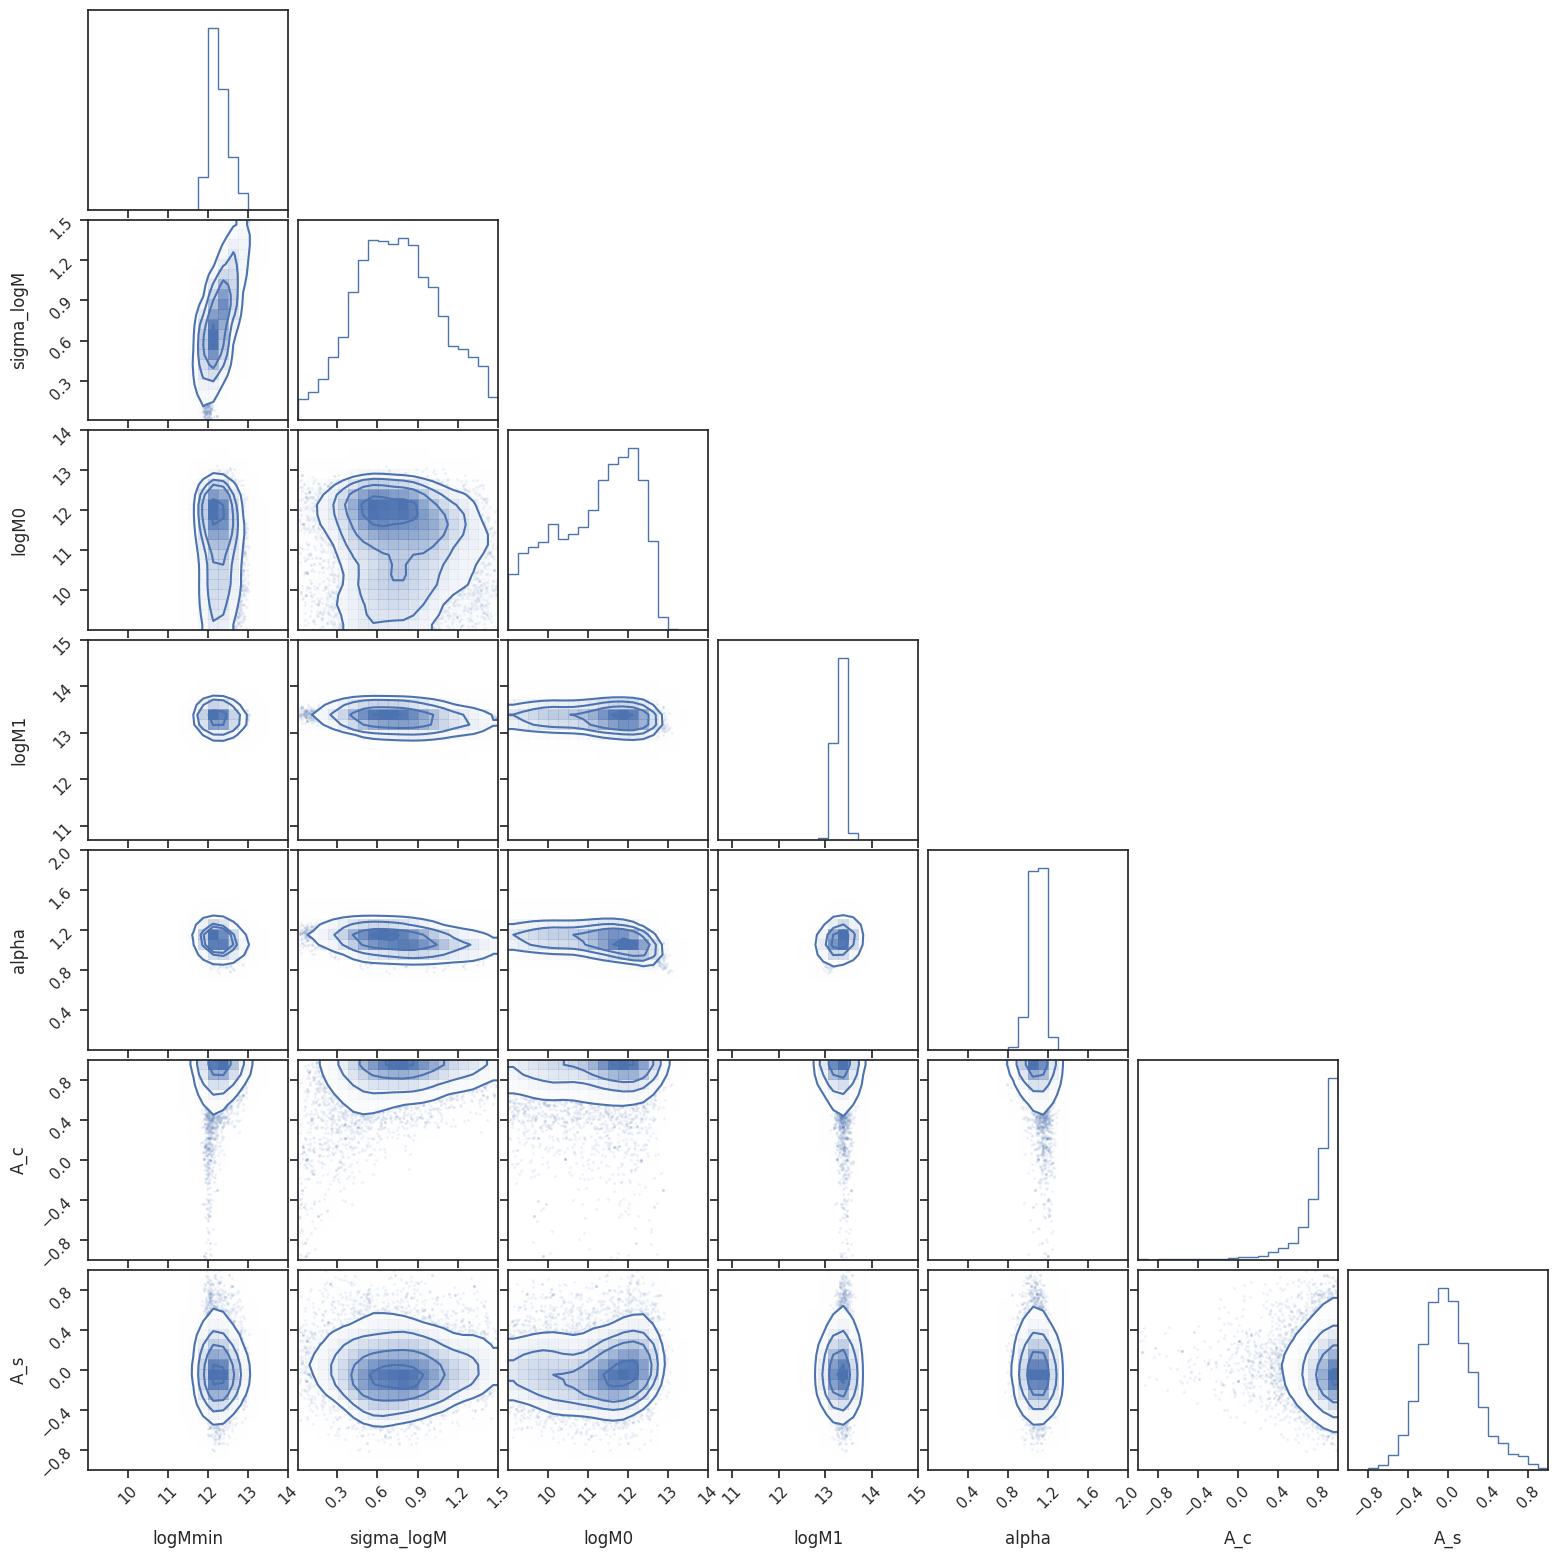

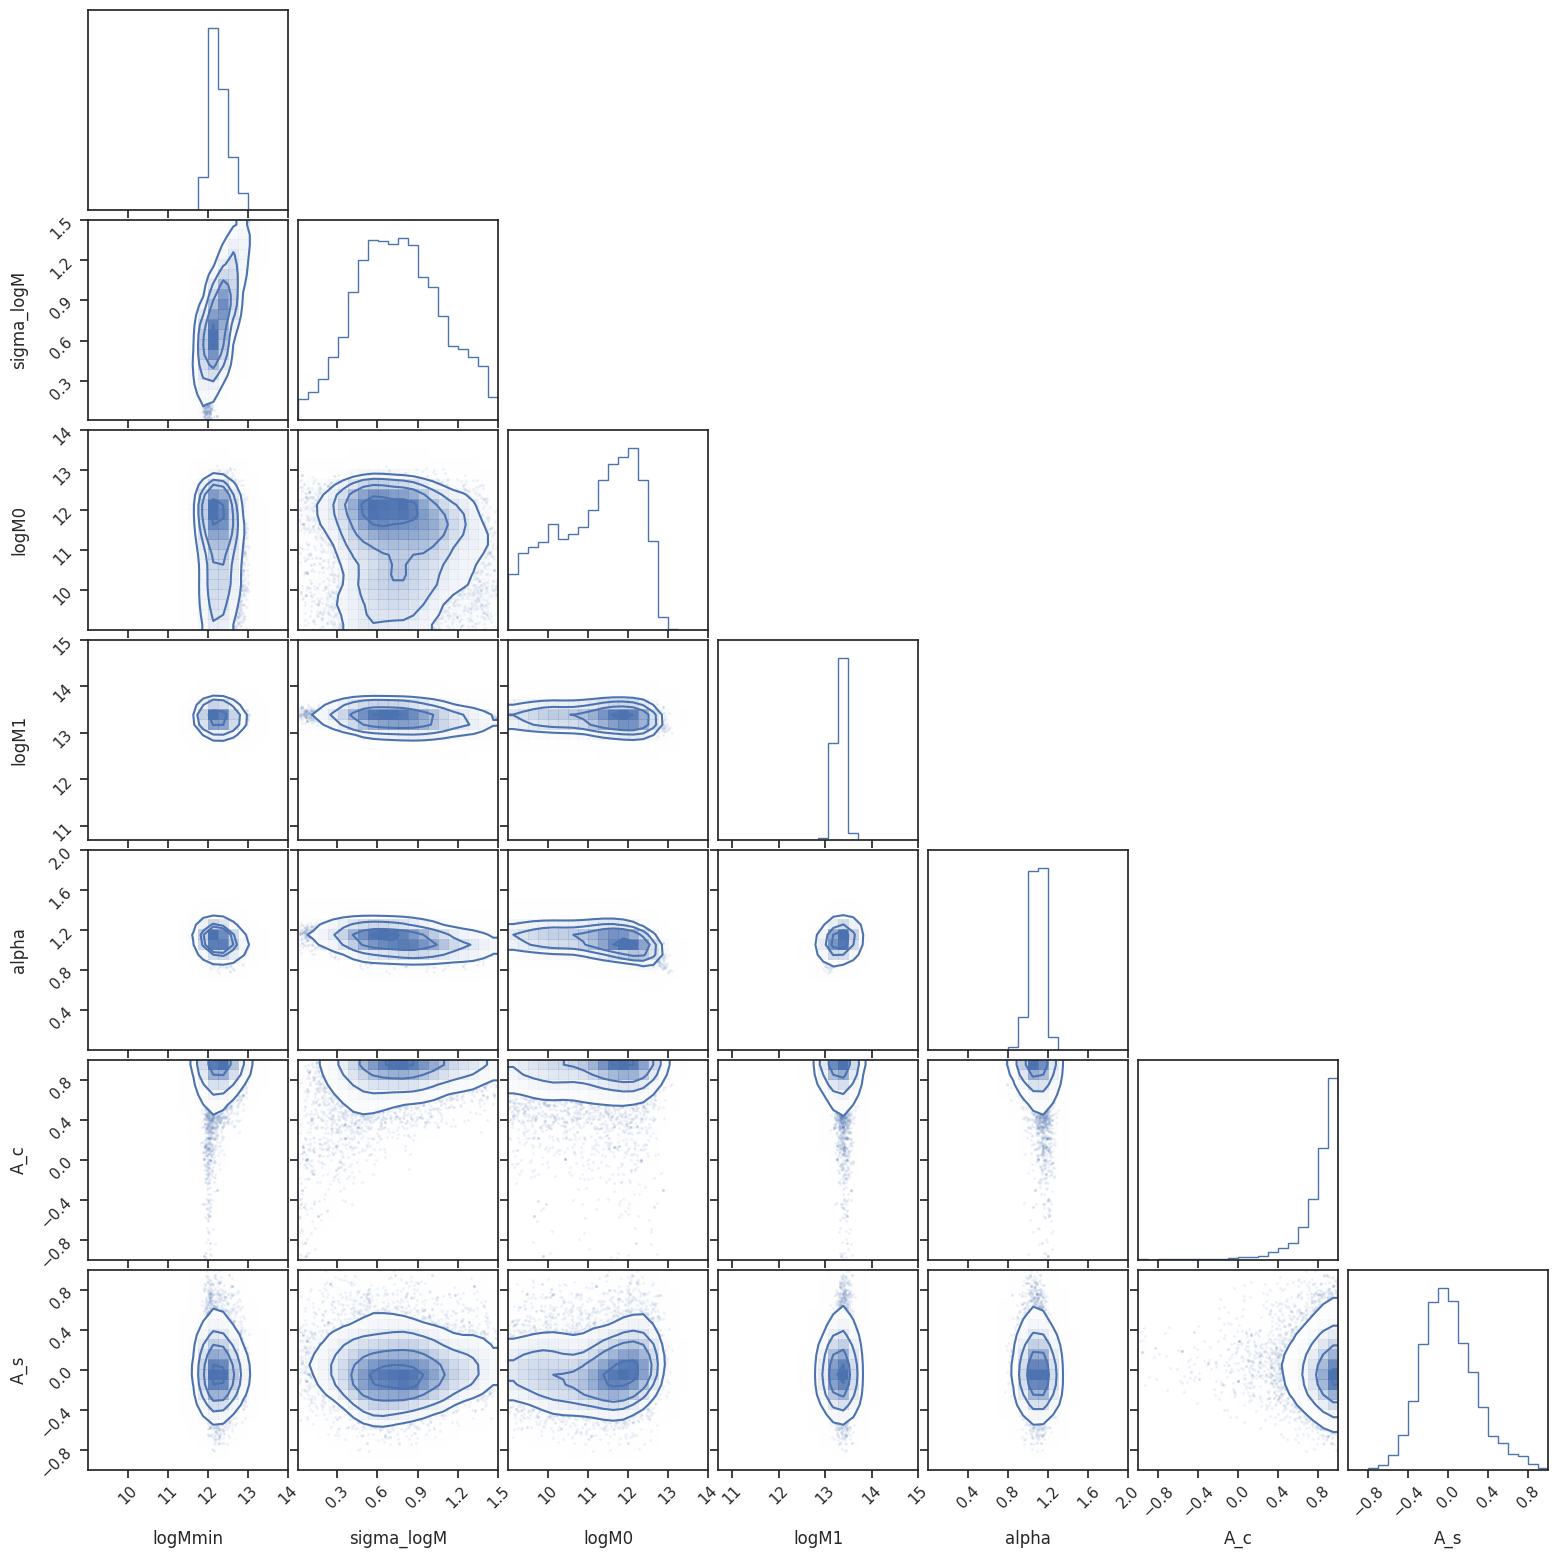

In [42]:
# Plot corner plot

corner.corner(samples, weights=weights, color='C0', smooth=1.0,
              labels=['logMmin', 'sigma_logM', 'logM0', 'logM1', 'alpha', 'A_c', 'A_s'],
              range=[(9,14),(0.01,1.5),(9,14),(10.7,15.0),(0,2),(-1,+1),(-1,+1)])

Overall, the distributions are centered in approximately the same places most of the time; however, they are significantly different (approximately $1\sigma$) for a couple of the parameters (e.g. $\mathrm{log}(M_0)$ and $A_{cen}$). The values estimated from MCMC are more similar to those in Fig. 6 of the linked ArXiV paper than the values estimated from the MLE are. Additionally, the shapes of the distributions are different (the distributions are very non-Gaussian in certain instances, so the Laplace approximation is a poor approximation of the data there). Notably, the posteriors of $\mathrm{log}(M_0)$ and $\sigma_{\mathrm{log}M}$ have substantial tails that are evident in the MCMC plots. This detail is lost when the Laplace approximation is made, since Gaussian distributions have no skew. The posteriors of the MCMC stair plot are much more similar to the plots of Fig. 6 in ArXiV paper than are those of the MLE plots in part 3.

***